# Figure S18

In [1]:

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



import scipy.optimize
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tkr
import scipy.stats as st
from scipy.stats import scoreatpercentile

from scipy.integrate import odeint, solve_ivp, lsoda
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from lmfit import Parameters, minimize, Model, report_fit, conf_interval
from sklearn.metrics import mean_squared_error

import glob

def significance_stars(p_value):
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '**'
    elif p_value < 0.05:
        return '*'
    else:
        return 'ns'
#import Aspartic_Fitter as fitter
#

# Asthetics

In [2]:
colors = [  "#56B4E9", "#009E73", "#CC79A7", "#999999", "#E69F00","#DB2B39", "#0076A1", "#0072B2", "#1A5042","#0C1713", "#6A6969"]
palette = sns.color_palette(colors)
n = 1

sns.set_theme(context='notebook', style='ticks', font='Arial', 
              font_scale=1.3, 
              rc={"lines.linewidth": n, 'axes.linewidth':n, 
                                  "xtick.major.width":n,"ytick.major.width":n}, 
              palette = palette)
sns.color_palette(colors)

[(0.33725490196078434, 0.7058823529411765, 0.9137254901960784),
 (0.0, 0.6196078431372549, 0.45098039215686275),
 (0.8, 0.4745098039215686, 0.6549019607843137),
 (0.6, 0.6, 0.6),
 (0.9019607843137255, 0.6235294117647059, 0.0),
 (0.8588235294117647, 0.16862745098039217, 0.2235294117647059),
 (0.0, 0.4627450980392157, 0.6313725490196078),
 (0.0, 0.4470588235294118, 0.6980392156862745),
 (0.10196078431372549, 0.3137254901960784, 0.25882352941176473),
 (0.047058823529411764, 0.09019607843137255, 0.07450980392156863),
 (0.41568627450980394, 0.4117647058823529, 0.4117647058823529)]

In [9]:
a = pd.read_csv("FigureS18.csv")

In [10]:

import matplotlib as mpl

def colorFader(c1, c2, mix=0):
    c1 = np.array(mpl.colors.to_rgb(c1))
    c2 = np.array(mpl.colors.to_rgb(c2))
    return tuple((1 - mix) * c1 + mix * c2)

def gradientFader(c1, c2, n):
    n = n-1
    gradient = []
    for x in range(n + 1):
        gradient.append(colorFader(c1, c2, x / n))
    return gradient

# Example usage:
c1 = 'C2'
c2 = 'C3'
gradient = gradientFader(c1, c2, n = 10)

/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_20241/4054954299.py:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data = a, x = "EDU", y = "Conversion",
/var/folders/tx/jcz7yt1s7tdg8h231t9g2zx40000gn/T/ipykernel_20241/4054954299.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(yticks = np.linspace(0, 100, 3), xlabel = "", ylabel = "", xticklabels=[""])


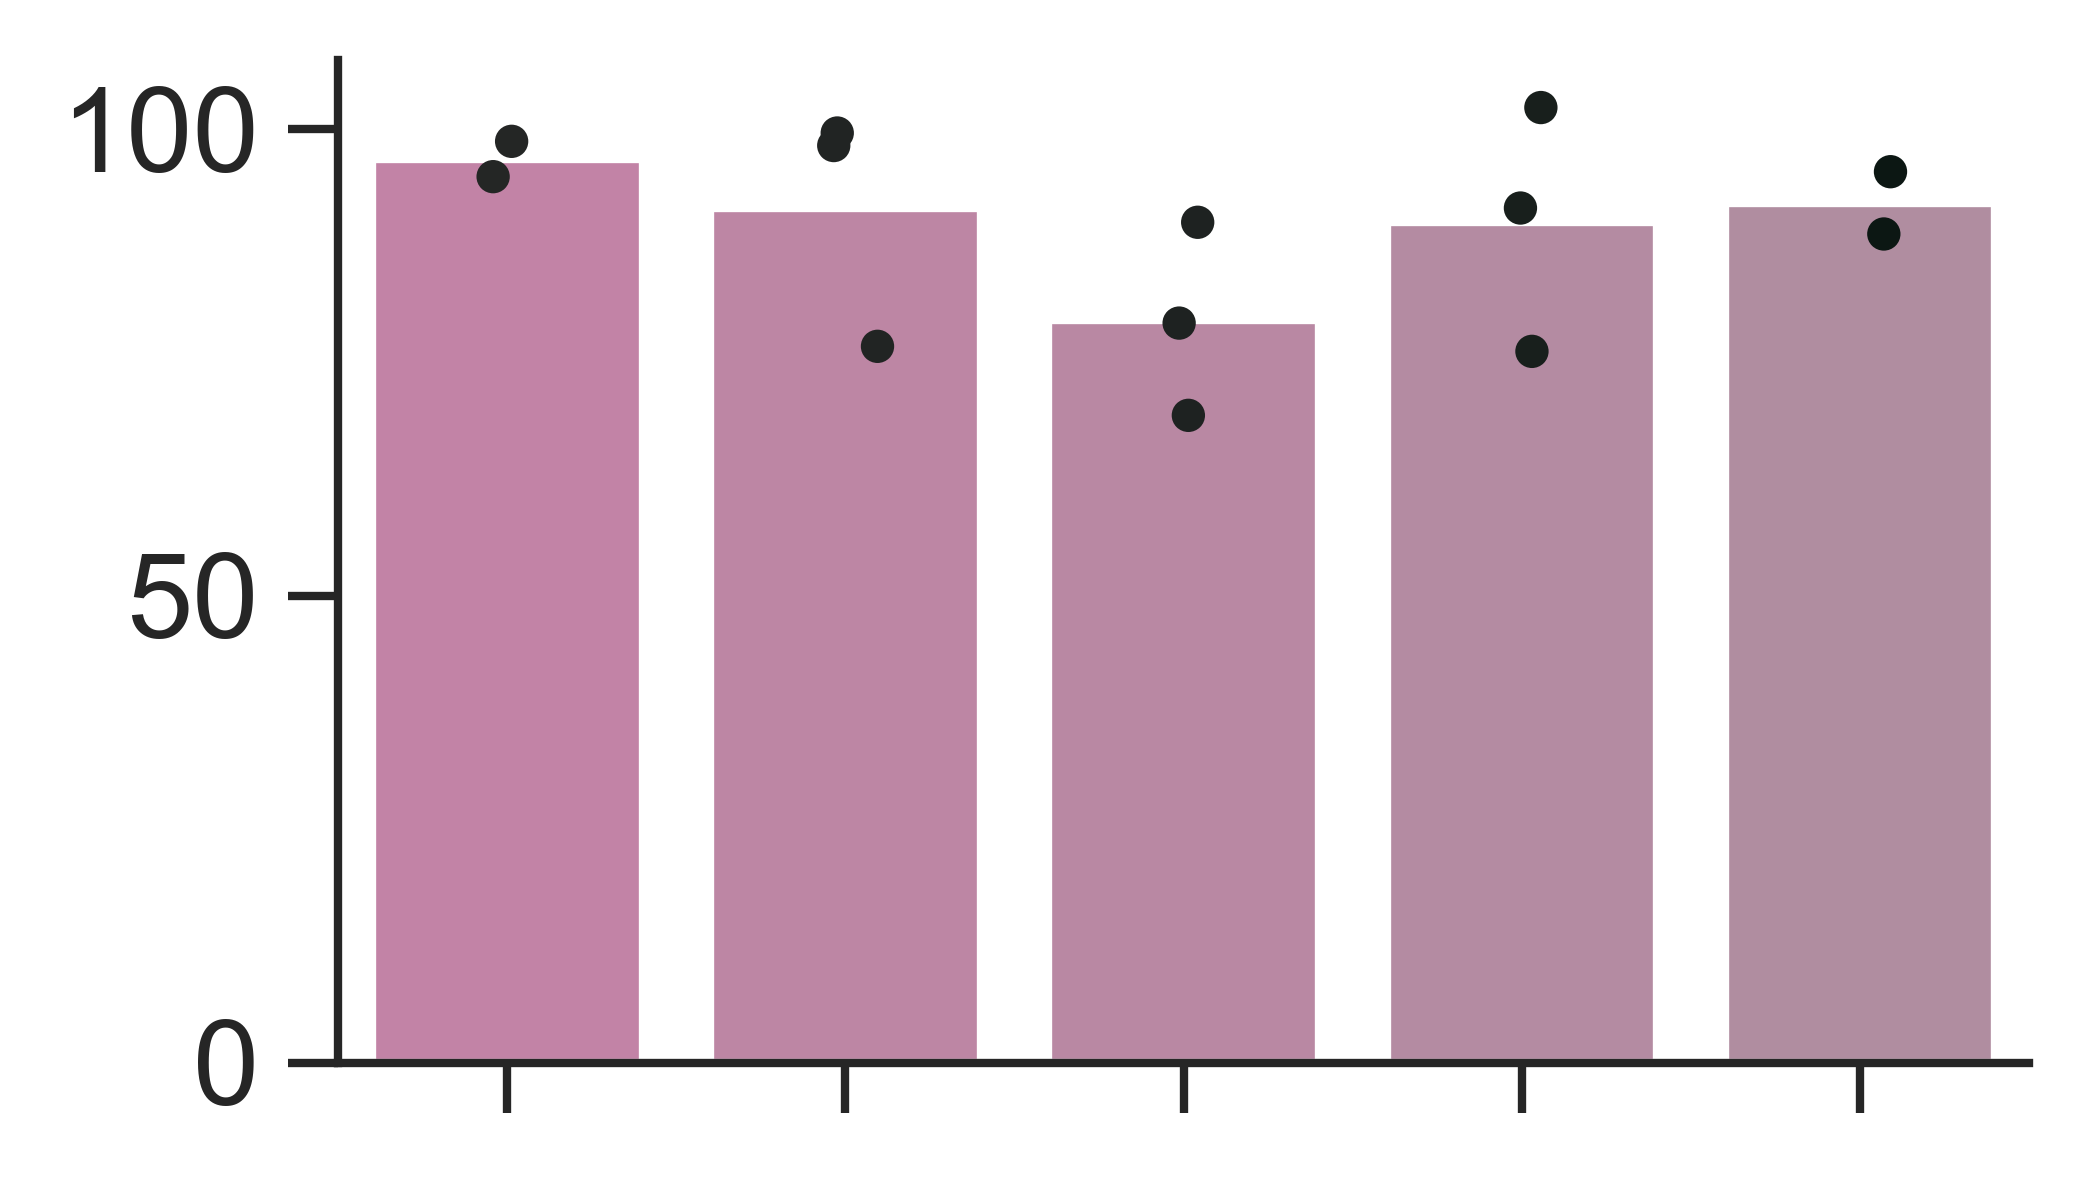

In [11]:
fig, ax = plt.subplots(figsize = (3.75,2.25), dpi = 600)

sns.stripplot(data = a, x = "EDU", y = "Conversion", 
              palette='dark:#0C1713', legend=False, ax = ax, hue = "EDU", s = 4,
              dodge=False)

 
sns.barplot(data = a, x = "EDU", y = "Conversion",
             hue = "EDU", 
             legend=False, 
             ax = ax, 
             dodge=False, 
             errorbar=None, palette= gradient) 
ax.set(yticks = np.linspace(0, 100, 3), xlabel = "", ylabel = "", xticklabels=[""])

sns.despine()
plt.tight_layout()

In [12]:
import pingouin as pg
from pingouin import anova

aov = pg.anova(data=a, dv='Conversion', between='EDU', detailed=True)
aov


,Source,SS,DF,MS,F,p-unc,np2
0,EDU,431.070297,4,107.767574,0.940142,0.487977,0.319761
1,Within,917.032755,8,114.629094,NaN,NaN,NaN


In [13]:
b = pg.pairwise_tukey(data=a, dv='Conversion', between='EDU').round(6)
b["Significance"] = b['p-tukey'].apply(significance_stars)
b

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,Significance
0,0,40,96.790667,91.510000,5.280667,9.773651,0.540296,0.980189,0.362841,ns
1,0,80,96.790667,79.517556,17.273111,9.773651,1.767314,0.449986,1.462957,ns
2,0,160,96.790667,90.008000,6.782667,9.773651,0.693975,0.952237,0.455519,ns
3,0,320,96.790667,92.093333,4.697333,10.706498,0.438737,0.990801,0.699828,ns
4,40,80,91.510000,79.517556,11.992444,8.741819,1.371848,0.659660,0.823456,ns
5,40,160,91.510000,90.008000,1.502000,8.741819,0.171818,0.999758,0.092597,ns
6,40,320,91.510000,92.093333,-0.583333,9.773651,-0.059684,0.999996,-0.039211,ns
7,80,160,79.517556,90.008000,-10.490444,8.741819,-1.200030,0.752023,-0.710120,ns
8,80,320,79.517556,92.093333,-12.575778,9.773651,-1.286702,0.706038,-1.030535,ns
9,160,320,90.008000,92.093333,-2.085333,9.773651,-0.213363,0.999431,-0.137139,ns
